# Coursera Capstone Report - Week 4

## Table of contents
[1. Introduction](#1.-Introduction) <br>
[2. Data](#2.-Data) <br>
[3. Methodology](#3.-Methodology) <br>
[4. Results](#4.-Results) <br>
[5. Discussion](#5.-Discussion) <br>
[6. Conclusion](#6.-Conclusion) <br>

<a id='1. Introduction'></a>

## 1. Introduction 

### 1.1 Problem description
<a id='1.1 Problem description'></a>

Over the course of the last few weeks, we have seen how we can manipulate geographical data to visualize it and extrapolate information. Using the same data set, along with location queries fulfilled by foursquare, we can now enhance the dataset we obtained in Week 3. The problem which we have chosen to tackle is deciding on what type of business we would like to invest in, based on the most popular types of venues in East Toronto.

### 1.2 Background discussion

Toronto is Canada's most populous city and is located on Lake Ontario’s northwestern shore. Within the city of Toronto is the the borough of Toronto and one of its regions is called East Toronto, or more commonly referred to as the East End. It used to be a borough of its own before being annexed to Toronto more than 100 years ago. Today, it is a lively place full of many cultural sites and thriving atmosphere. It currently consists of 5 neighborhoods. 

## 2. Data
<a id='2. Data'></a>

For the project we are using the data obtained in Week-3 which has been cleaned and organized, as well as data regarding venues in East Toronto from Foursquare. The data was sourced from https://cocl.us/Geospatial_data.

### 2.1 Pre-processing

The data was loaded into the notebook using the **pd.read_csv** command, which allowed us to tidy it by removing postal codes not associated with places of interest to us. This left us with categorized information about the boroughs and neighborhoods in Toronto. Similar to what was done in previous assignments we could easily select a specific region of the studied area. The decision was made for that region to be East Toronto. Through working with the data, we found that it has a very low number of neighborhoods - 5. This proved very useful as the k neighbors was very low, as the points were all very distinct, hence it could be taken as two ways: either have one large cluster, which would defeat the purpose of the study, or have 5 clusters, or in other words each neighborhood studied on its own. 

    - Below we can see the list of neighborhoods and their respective coordinates

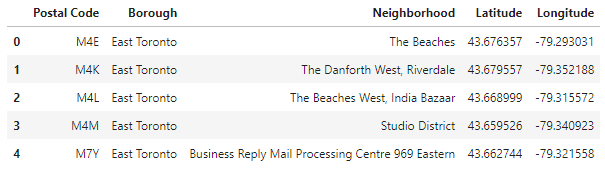

## 3. Methodology
<a id='3. Methodology'></a>

### 3.1 Libraries and initial data import

As per usual we start the  project by importing the necessary libraries and packages. One that stands out, as it did in Week 3 is beautifulsoup4 which we use to pull the data from the xml address. Along with that we have geopy and geocoder which are later used for the location and mapping data. 

In [4]:
!conda install -c anaconda beautifulsoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |           py36_0         165 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0              |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.9.0-py36_0
  soupsieve          anaconda/noarch::soupsieve-2.0-py_0

The following packages

In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
!conda install -c conda-forge geocoder --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         837 KB

The following NEW packages will be INSTALLED:

  click              conda-forge/noarch::click-7.1.2-pyh9f0ad1d_0
  decorator          conda-forge/noarch::decorator-4.4.2-py_0
  future             conda-forge/linux-64::future-0.18.2-py36h9f0ad1d_1
  geocoder       

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [5]:
import pandas as pd
import numpy as np
import requests
import random
from bs4 import BeautifulSoup 
import geocoder
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Next, we need to link the app credentials, which we made on foursquare. This allows us to make calls to the foursquare API. 

In [6]:
CLIENT_ID = '5FWPE5F4YXCJ152HQMN23DLB0WGSHR4ACRLVLB1MRLDQDXS1'
CLIENT_SECRET = 'AXKUYETLGBD31HFI0XVB1DQH2THO340Q1TS13HWB2IXTWBAV'

VERSION = '20180604'
LIMIT = 30

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
GeoLocator = Nominatim(user_agent='Capstone-Week-4')

In [8]:
Toronto_Part_2_csv = "Toronto_Part_2.csv"
toronto_neighborhoods = pd.read_csv(Toronto_Part_2_csv)

In [9]:
toronto_neighborhoods.shape
toronto_neighborhoods.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [10]:
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=FutureWarning)

Similar to previous weeks we can use the Folium library to visualize the location data on a map. Here, we show all the postal code coordinates with their respective neighborhoods.

In [11]:
address = 'Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [12]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(toronto_neighborhoods['Latitude'],
                                           toronto_neighborhoods['Longitude'],
                                           toronto_neighborhoods['Borough'],
                                           toronto_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)
map_toronto

In [13]:
address = 'East Toronto, Ontario Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [14]:
pip install lxml

     |████████████████████████████████| 5.8MB 4.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Next, we start to work only with the data which concerns East Toronto. Below we can see the 5 neighborhoods of the area as well as their location data. For ease of understanding, we can now manipulate the data so that the map displays only the 5 neighborhoods of interest.

In [15]:
toronto_data = toronto_neighborhoods[toronto_neighborhoods['Borough'].str.contains("East Toronto")].reset_index(drop=True)
print(toronto_data.shape)
toronto_data.head()

(5, 5)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558


In [19]:
neighborhood_latitude = toronto_data.loc[0, 'Latitude']
neighborhood_longitude = toronto_data.loc[0, 'Longitude']
neighborhood_name = toronto_data.loc[0, 'Neighborhood']

In [20]:
df=pd.read_csv(Toronto_Part_2_csv)

sdf = pd.read_csv('https://cocl.us/Geospatial_data')

sdf.loc[sdf['Postal Code'] == sdf['Postal Code'], 'Latitude'] = sdf['Latitude']

sdf.loc[sdf['Postal Code'] == sdf['Postal Code'], 'Longitude'] = sdf['Longitude']

sdf

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [17]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(toronto_data['Latitude'],
                           toronto_data['Longitude'],
                           toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3472FF',
        fill_opacity=0.1,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Using the requests library, we can make calls to foursquare in order to get venue data for the selected locations.

In [21]:
LIMIT = 100
radius = 300
url_4sq = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [22]:
results = requests.get(url_4sq).json()

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name',
                    'venue.categories', 
                    'venue.location.lat', 
                    'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,Glen Stewart Ravine,Other Great Outdoors,43.676300,-79.294784
2,Glen Stewart Park,Park,43.675278,-79.294647
3,Balmy Beach Playground,Playground,43.676078,-79.290805


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                    
        url_4sq = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
                   
        results = requests.get(url_4sq).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
east_toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],   
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude'])

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Business Reply Mail Processing Centre 969 Eastern


In [27]:
east_toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Business Reply Mail Processing Centre 969 Eastern,7,7,7,7,7,7
Studio District,25,25,25,25,25,25
The Beaches,4,4,4,4,4,4
"The Beaches West, India Bazaar",15,15,15,15,15,15
"The Danforth West, Riverdale",22,22,22,22,22,22


In [28]:
east_toronto_onehot = pd.get_dummies(east_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

east_toronto_onehot['Neighbourhood'] = east_toronto_venues['Neighbourhood'] 

fixed_columns = [east_toronto_onehot.columns[-1]] + list(east_toronto_onehot.columns[:-1])
east_toronto_onehot = east_toronto_onehot[fixed_columns]

In [29]:
east_toronto_grouped = east_toronto_onehot.groupby('Neighbourhood').mean().reset_index()
east_toronto_grouped

,Neighbourhood,American Restaurant,Auto Workshop,Bakery,Bank,Bar,Board Shop,Bookstore,Brewery,Bubble Tea Shop,Burrito Place,Café,Cheese Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Dessert Shop,Diner,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fruit & Vegetable Store,Garden,Gastropub,Gay Bar,Greek Restaurant,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Juice Bar,Latin American Restaurant,Light Rail Station,Liquor Store,Movie Theater,Other Great Outdoors,Park,Pet Store,Playground,Pub,Restaurant,Sandwich Place,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Trail,Yoga Studio
0,Business Reply Mail Processing Centre 969 Eastern,0.00,0.142857,0.00,0.00,0.00,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.142857,0.142857,0.000000,0.00,0.000000,0.142857,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.00,0.142857,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000
1,Studio District,0.04,0.000000,0.04,0.04,0.04,0.000000,0.04,0.000000,0.000000,0.000000,0.080000,0.04,0.04,0.12,0.04,0.04,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.04,0.000000,0.000000,0.04,0.04,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.04,0.000000,0.000000,0.000000,0.00,0.000000,0.040000,0.00,0.000000,0.000000,0.04,0.04,0.000000,0.04,0.00,0.000000
2,The Beaches,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.250000,0.000000,0.25,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.25,0.000000
3,"The Beaches West, India Bazaar",0.00,0.000000,0.00,0.00,0.00,0.066667,0.00,0.000000,0.000000,0.066667,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.133333,0.066667,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.066667,0.066667,0.000000,0.066667,0.000000,0.00,0.000000,0.066667,0.066667,0.00,0.066667,0.066667,0.00,0.066667,0.066667,0.00,0.00,0.066667,0.00,0.00,0.000000
4,"The Danforth West, Riverdale",0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.045455,0.045455,0.000000,0.045455,0.00,0.00,0.00,0.00,0.00,0.045455,0.045455,0.00,0.000000,0.000000,0.000000,0.00,0.045455,0.000000,0.00,0.00,0.318182,0.000000,0.090909,0.045455,0.045455,0.045455,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.045455,0.090909,0.00,0.00,0.000000,0.00,0.00,0.045455


In [34]:
num_top_venues = 10
for hood in east_toronto_grouped['Neighbourhood']:
    print(""+hood+"")
    temp = east_toronto_grouped[east_toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

Business Reply Mail Processing Centre 969 Eastern
                  venue  freq
0                Garden  0.14
1         Auto Workshop  0.14
2  Fast Food Restaurant  0.14
3               Brewery  0.14
4        Farmers Market  0.14
5    Light Rail Station  0.14
6                  Park  0.14
7         Movie Theater  0.00
8        Ice Cream Shop  0.00
9     Indian Restaurant  0.00
Studio District
                       venue  freq
0                Coffee Shop  0.12
1                       Café  0.08
2        American Restaurant  0.04
3             Ice Cream Shop  0.04
4                    Gay Bar  0.04
5                  Gastropub  0.04
6                Fish Market  0.04
7                  Pet Store  0.04
8                      Diner  0.04
9  Latin American Restaurant  0.04
The Beaches
                  venue  freq
0  Other Great Outdoors  0.25
1                 Trail  0.25
2            Playground  0.25
3                  Park  0.25
4          Liquor Store  0.00
5      Greek Restaurant  0.

Next, we can sort the data we got from foursquare to obtain a relation between the neighborhoods and the most popular types of venues in them

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = east_toronto_grouped['Neighbourhood']

for ind in np.arange(east_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(east_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Business Reply Mail Processing Centre 969 Eastern,Garden,Light Rail Station,Auto Workshop,Fast Food Restaurant,Farmers Market,Brewery,Park,Diner,Dessert Shop,Cosmetics Shop
1,Studio District,Coffee Shop,Café,American Restaurant,Convenience Store,Clothing Store,Ice Cream Shop,Cheese Shop,Italian Restaurant,Latin American Restaurant,Diner
2,The Beaches,Trail,Playground,Park,Other Great Outdoors,Yoga Studio,Cheese Shop,Farmers Market,Diner,Dessert Shop,Cosmetics Shop
3,"The Beaches West, India Bazaar",Fast Food Restaurant,Park,Pet Store,Ice Cream Shop,Burrito Place,Italian Restaurant,Liquor Store,Movie Theater,Board Shop,Hotel
4,"The Danforth West, Riverdale",Greek Restaurant,Ice Cream Shop,Restaurant,Yoga Studio,Indian Restaurant,Café,Bubble Tea Shop,Brewery,Juice Bar,Italian Restaurant


In [32]:
neighborhoods_venues_sorted.rename(columns={'Neighbourhood':'Neighborhood',}, inplace=True)

Finally, we can merge the two datasets we made into one, which contains all the information we are seeking. 

In [33]:
df_merged = toronto_data
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
df_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Trail,Playground,Park,Other Great Outdoors,Yoga Studio,Cheese Shop,Farmers Market,Diner,Dessert Shop,Cosmetics Shop
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Greek Restaurant,Ice Cream Shop,Restaurant,Yoga Studio,Indian Restaurant,Café,Bubble Tea Shop,Brewery,Juice Bar,Italian Restaurant
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,Fast Food Restaurant,Park,Pet Store,Ice Cream Shop,Burrito Place,Italian Restaurant,Liquor Store,Movie Theater,Board Shop,Hotel
3,M4M,East Toronto,Studio District,43.659526,-79.340923,Coffee Shop,Café,American Restaurant,Convenience Store,Clothing Store,Ice Cream Shop,Cheese Shop,Italian Restaurant,Latin American Restaurant,Diner
4,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern,43.662744,-79.321558,Garden,Light Rail Station,Auto Workshop,Fast Food Restaurant,Farmers Market,Brewery,Park,Diner,Dessert Shop,Cosmetics Shop


## 4. Results
<a id='4. Results'></a>

#### The results of the data analysis are as follows: <br>
 - Two categories of venues stand out as most common: hospitality and parks <br>
 - The beaches neighborhood stands out with most outdoor venues <br>
 - The Danforth West neighborhood has the highest frequency of food <br> hospitality venues
 - The Studio district stands out for its abundance of cafes and bars <br>
 - The India Bazaar shows a great deal of diversity in its shopping venues <br>

## 5. Discussion
<a id='5. Discussion'></a>

The analysis shows the clear diversity of venues in some parts of the region such as the India Bazaar and the clear distinction between the outdoor and hospitality venues such the Beaches. <br>

The benefits of the analysis is that it clearly lists the most popular types of venues in order to give a more clear picture to the investors on what the points of interest are. In reflection to that the drawbacks are that due to working with a small area, in comparison to all of Toronto, the picture that is built might not be entirely representative of the region. Additionally, this is only a preliminary analysis of the geographical locations of the venues and not a summative assessment of the business prospects of the region. At this stage of the analysis that might not be viable. <br> 

Furthermore, additional analysis of neighboring areas might be needed in order to clarify the prospectus data. 

<br>


## 6. Conclusion
<a id='6. Conclusion'></a>

In conclusion, we get a small glimpse into what the area holds as prospects but is not indicative enough to signal any particular strength for the types of venues. 
<br>

Based on this information the next steps for the investors will be to move past the preliminary analysis of the area and focus on the different types of venues throughout, as well as statistical data which could shine more light onto the profitability of the area by taking factors such as average rent price, population flow and sustainability. 
<br>